<a href="https://colab.research.google.com/github/LizzVallarie/AI-For-Software-Engineering/blob/main/AI_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Problem Definition

Hypothetical AI Problem: Predicting patient readmission risk within 30 days of discharge

Objectives:

Identify high-risk patients for targeted interventions

Reduce hospital readmission rates by 20% within one year

Improve resource allocation for post-discharge care

Stakeholders:

Hospital administrators (for resource planning)

Clinical staff (for patient care decisions)

KPI: Reduction in 30-day readmission rate compared to baseline

## Data Collection & Preprocessing

Data Sources:

Electronic Health Records (EHRs) - patient history, medications, lab results

Administrative data - previous admissions, discharge summaries

Potential Bias: Underrepresentation of minority groups in historical data leading to poorer predictions for these populations

Preprocessing Steps:

Handling missing data - impute missing lab values with median values

Normalization - scale numerical features like age, blood pressure

Encoding - convert categorical variables like diagnosis codes to numerical representations

##  Model Development

Chosen Model: Gradient Boosting Machine (XGBoost)

Justification:

Handles mixed data types well

Provides good predictive performance

Offers feature importance insights

More interpretable than deep learning for healthcare applications

Data Splitting:

60% training

20% validation (for hyperparameter tuning)

20% test (final evaluation)

Hyperparameters to Tune:

Learning rate - controls contribution of each tree

Max depth - prevents overcomplex trees

## Evaluation & Deployment

Evaluation Metrics:

AUC-ROC - important for imbalanced classification (few patients get readmitted)

Recall - we want to minimize false negatives (missed high-risk patients)

Concept Drift: When patient demographics or care protocols change over time, making the model less accurate. Would monitor by tracking prediction distributions and periodically re-evaluating on new data.

Technical Challenge: Integrating with hospital's legacy EHR systems while maintaining real-time prediction capabilities

## Case Study Application

Problem Scope
Problem: Predict which patients are at high risk of readmission within 30 days of discharge to enable targeted interventions.
Objectives:

Achieve ≥0.85 AUC in predicting readmissions

Reduce readmissions by 15% in first year

Provide interpretable risk factors to clinicians
Stakeholders:

Hospital clinicians

Care coordinators

Hospital administrators

Patients


Data Strategy
Data Sources
EHRs (vitals, medications, lab results)

Socioeconomic data (from patient surveys)

Previous admission records
## Ethical Concerns:
Patient privacy - must comply with HIPAA regulations

Potential for discrimination if model biases lead to unequal care
## Preprocessing Pipeline
Data cleaning (handle missing values, outliers)

Feature engineering:

Create time since last admission

Calculate medication count

Flag chronic conditions

Normalization of numerical features

One-hot encoding for categorical variables



## Model Development

Chosen Model: XGBoost with SHAP explanations

Justification:

Handles mixed data types

Provides feature importance

Good performance on tabular data

Better interpretability than neural networks

Confusion Matrix (hypothetical)

            Predicted 0  Predicted 1
Actual 0        850           50
Actual 1         80          120

Calculations:

Precision = TP/(TP+FP) = 120/(120+50) = 0.706

Recall = TP/(TP+FN) = 120/(120+80) = 0.60

## Deployment

Integration Steps

Create API wrapper around model

Integrate with hospital EHR system

Set up real-time prediction when discharge is planned

Create clinician dashboard showing risk scores and key factors

## Regulatory Compliance

Data anonymization

Role-based access control

Audit logging

Regular security assessments

Model explainability for clinician review

## Optimization

Overfitting Solution: Implement early stopping during training - stop when validation performance stops improving for 50 consecutive iterations

## Critical Thinking

Impact of Biased Data:

Could systematically underestimate risk for minority groups

Might lead to inadequate follow-up care for these patients

Could perpetuate existing healthcare disparities
Mitigation Strategy:

Audit model performance across demographic subgroups

Apply reweighting techniques to balance representation

Include fairness metrics in model evaluation

## Trade-offs

## Interpretability vs Accuracy

In healthcare, interpretability is often more important than slight accuracy gains because:

Clinicians need to understand model decisions to trust them

Regulatory requirements may demand explainability

Patient outcomes are at stake

However, we can't sacrifice too much accuracy. A balanced approach is using interpretable models like XGBoost with SHAP explanations rather than black-box models.

## Limited Computational Resources

Would favor:

Simpler models like logistic regression

Feature selection to reduce dimensionality

Maybe cloud-based solutions rather than on-premise deployment

Smaller ensemble models rather than large neural networks

## Reflection & Workflow Diagram

Most Challenging Part: Ensuring ethical deployment while maintaining model performance. Healthcare applications have serious consequences, so we must balance predictive power with fairness, interpretability, and privacy
Improvements with More Resources:

Collect more diverse training data

Implement more sophisticated bias detection

Develop better clinician interfaces

Run larger hyperparameter searches


## Diagram and Code

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [10]:
import pandas as pd

# Example URL to a CSV dataset (using UCI ML Breast Cancer dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Load with pandas
column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1,31)]
df = pd.read_csv(url, header=None, names=column_names)

print(df.head())
print(f"\nDataset shape: {df.shape}")

         id diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [6]:
# Evaluation
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


AUC-ROC: 0.9950867998689813


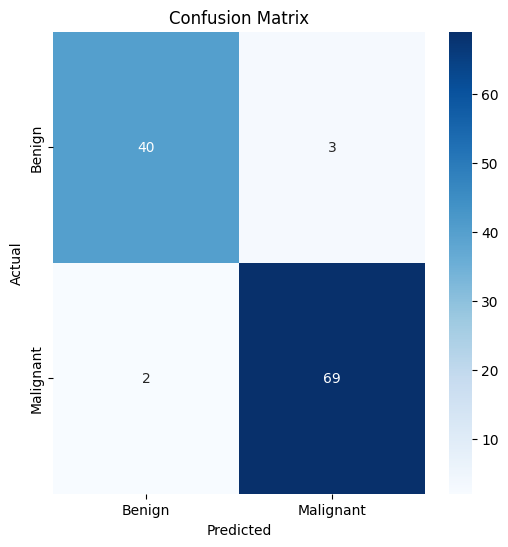

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

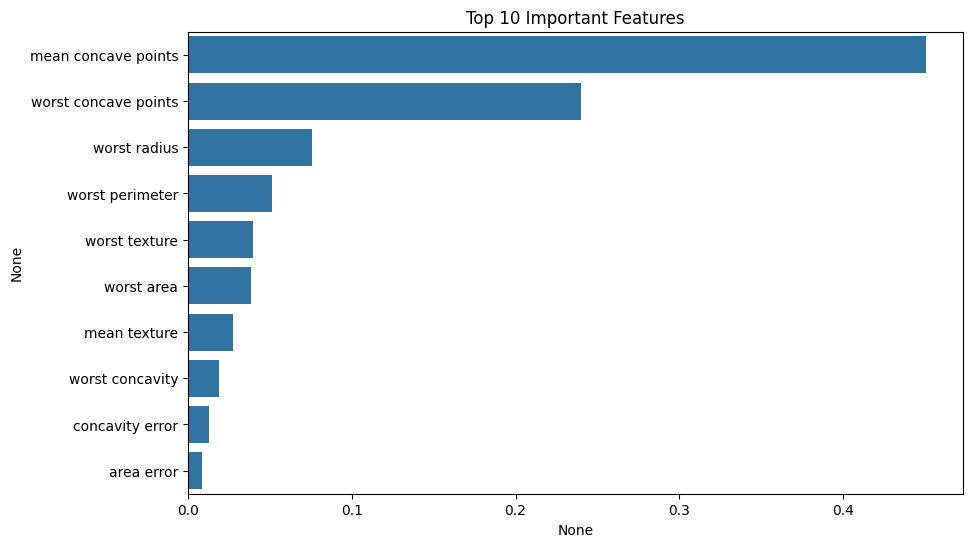

In [8]:
# Feature Importance
feature_imp = pd.Series(model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.title('Top 10 Important Features')
plt.show()